In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
def split(img):
  height = img.shape[0]
  width = img.shape[1]
  w2 = width // 2
  left = img[:, :w2]
  right = img[:, w2:]
  h2 = height//2
  topleft = left[:h2, :]
  bottomleft = left[h2:, :]
  topright = right[:h2, :]
  bottomright = right[h2:, :]
  return topleft, bottomleft, topright, bottomright

In [ ]:
X_train_tl=[]
X_train_bl=[]
X_train_tr=[]
X_train_br=[]
for i in range(len(X_train)):
  tl, bl, tr, br = split(X_train[i])
  X_train_tl.append(tl)
  X_train_bl.append(bl)
  X_train_tr.append(tr)
  X_train_br.append(br)
X_train_tl=np.array(X_train_tl)
X_train_bl=np.array(X_train_bl)
X_train_tr=np.array(X_train_tr)
X_train_br=np.array(X_train_br)

In [ ]:
X_test_tl=[]
X_test_bl=[]
X_test_tr=[]
X_test_br=[]
for i in range(len(X_test)):
  tl, bl, tr, br = split(X_test[i])
  X_test_tl.append(tl)
  X_test_bl.append(bl)
  X_test_tr.append(tr)
  X_test_br.append(br)
X_test_tl=np.array(X_test_tl)
X_test_bl=np.array(X_test_bl)
X_test_tr=np.array(X_test_tr)
X_test_br=np.array(X_test_br)

In [ ]:
X_test_br.shape

(10000, 14, 14)

In [ ]:
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

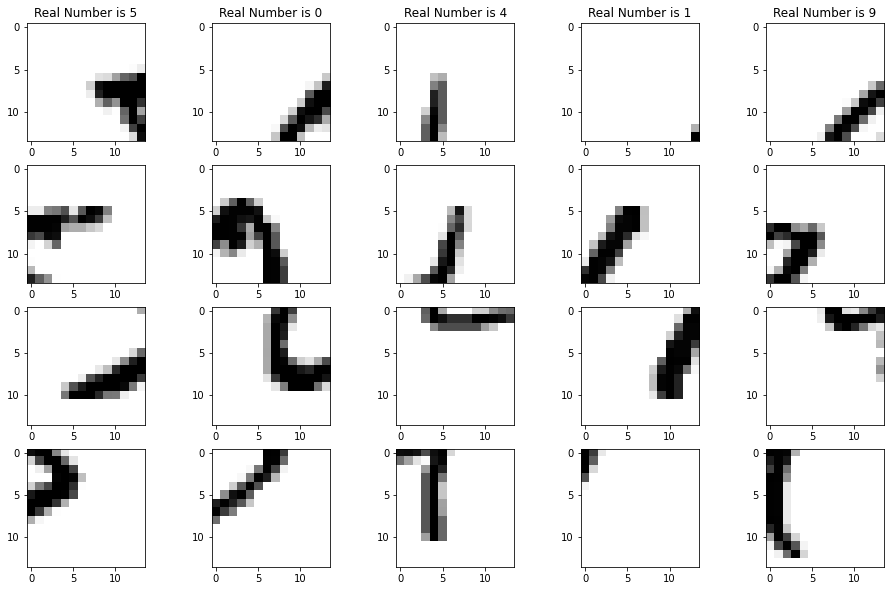

In [ ]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=5, nrows=4, figsize=(16, 10))
for i in range(5):
  digit = Y_train[i].argmax()
  axes[0,i].imshow(X_train_tl[i], cmap='binary')
  axes[1,i].imshow(X_train_tr[i], cmap='binary')
  axes[2,i].imshow(X_train_bl[i], cmap='binary')
  axes[3,i].imshow(X_train_br[i], cmap='binary')
  axes[0,i].set_title(f"Real Number is {digit}")

In [ ]:
X_train_tr = X_train_tr.reshape(-1,14,14,1)
X_test_tr = X_test_tr.reshape(-1,14,14,1)
X_train_tr = X_train_tr/255.0
X_test_tr = X_test_tr/255.0

X_train_tl = X_train_tl.reshape(-1,14,14,1)
X_test_tl = X_test_tl.reshape(-1,14,14,1)
X_train_tl = X_train_tl/255.0
X_test_tl = X_test_tl/255.0

X_train_br = X_train_br.reshape(-1,14,14,1)
X_test_br = X_test_br.reshape(-1,14,14,1)
X_train_br = X_train_br/255.0
X_test_br = X_test_br/255.0

X_train_bl = X_train_bl.reshape(-1,14,14,1)
X_test_bl = X_test_bl.reshape(-1,14,14,1)
X_train_bl = X_train_bl/255.0
X_test_bl = X_test_bl/255.0
print('X_train shape:', X_train_tr.shape)
print(X_train_tr.shape[0], 'training samples')
print(X_test_tr.shape[0], 'testing samples')

X_train shape: (60000, 14, 14, 1)
60000 training samples
10000 testing samples


In [ ]:
model_tl = Sequential()
model_tl.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(14, 14, 1)))
model_tl.add(Conv2D(64, kernel_size=3, activation='relu'))
model_tl.add(Dropout(0.5))
model_tl.add(Flatten())
model_tl.add(Dense(10, activation='softmax'))
model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_tl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 10)                64010     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_tl.fit(X_train_tl, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test_tl, Y_test))

Epoch 1/20
469/469 [==============================] - 41s 81ms/step - loss: 1.0888 - accuracy: 0.6357 - val_loss: 0.7732 - val_accuracy: 0.7382
Epoch 2/20
469/469 [==============================] - 32s 67ms/step - loss: 0.8132 - accuracy: 0.7232 - val_loss: 0.7055 - val_accuracy: 0.7585
Epoch 3/20
469/469 [==============================] - 51s 108ms/step - loss: 0.7607 - accuracy: 0.7396 - val_loss: 0.6684 - val_accuracy: 0.7706
Epoch 4/20
469/469 [==============================] - 34s 72ms/step - loss: 0.7287 - accuracy: 0.7510 - val_loss: 0.6613 - val_accuracy: 0.7695
Epoch 5/20
469/469 [==============================] - 32s 68ms/step - loss: 0.7072 - accuracy: 0.7585 - val_loss: 0.6350 - val_accuracy: 0.7830
Epoch 6/20
469/469 [==============================] - 35s 75ms/step - loss: 0.6899 - accuracy: 0.7627 - val_loss: 0.6328 - val_accuracy: 0.7798
Epoch 7/20
469/469 [==============================] - 31s 67ms/step - loss: 0.6784 - accuracy: 0.7665 - val_loss: 0.6153 - val_accuracy

In [ ]:
score = model_tl.evaluate(X_test_tl, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5689173340797424
Test accuracy: 0.8025000095367432


In [ ]:
model_tr = Sequential()
model_tr.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(14, 14, 1)))
model_tr.add(Conv2D(64, kernel_size=3, activation='relu'))
model_tr.add(Dropout(0.5))
model_tr.add(Flatten())
model_tr.add(Dense(10, activation='softmax'))
model_tr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_tr.fit(X_train_tr, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test_tr, Y_test))

Epoch 1/10
469/469 [==============================] - 32s 68ms/step - loss: 0.7654 - accuracy: 0.7418 - val_loss: 0.5347 - val_accuracy: 0.8188
Epoch 2/10
469/469 [==============================] - 32s 67ms/step - loss: 0.5146 - accuracy: 0.8242 - val_loss: 0.4589 - val_accuracy: 0.8463
Epoch 3/10
469/469 [==============================] - 32s 67ms/step - loss: 0.4653 - accuracy: 0.8383 - val_loss: 0.4309 - val_accuracy: 0.8577
Epoch 4/10
469/469 [==============================] - 32s 67ms/step - loss: 0.4391 - accuracy: 0.8503 - val_loss: 0.4089 - val_accuracy: 0.8651
Epoch 5/10
469/469 [==============================] - 31s 67ms/step - loss: 0.4178 - accuracy: 0.8547 - val_loss: 0.3978 - val_accuracy: 0.8669
Epoch 6/10
469/469 [==============================] - 34s 73ms/step - loss: 0.4012 - accuracy: 0.8623 - val_loss: 0.3919 - val_accuracy: 0.8673
Epoch 7/10
469/469 [==============================] - 32s 67ms/step - loss: 0.3911 - accuracy: 0.8643 - val_loss: 0.3849 - val_accuracy:

In [ ]:
model_bl = Sequential()
model_bl.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(14, 14, 1)))
model_bl.add(Conv2D(64, kernel_size=3, activation='relu'))
model_bl.add(Dropout(0.5))
model_bl.add(Flatten())
model_bl.add(Dense(10, activation='softmax'))
model_bl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_bl.fit(X_train_bl, Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test_bl, Y_test))

Epoch 1/10
469/469 [==============================] - 35s 74ms/step - loss: 0.7747 - accuracy: 0.7308 - val_loss: 0.5373 - val_accuracy: 0.8071
Epoch 2/10
469/469 [==============================] - 32s 68ms/step - loss: 0.5421 - accuracy: 0.8063 - val_loss: 0.4913 - val_accuracy: 0.8201
Epoch 3/10
469/469 [==============================] - 32s 68ms/step - loss: 0.4978 - accuracy: 0.8201 - val_loss: 0.4593 - val_accuracy: 0.8319
Epoch 4/10
469/469 [==============================] - 32s 68ms/step - loss: 0.4716 - accuracy: 0.8273 - val_loss: 0.4455 - val_accuracy: 0.8351
Epoch 5/10
469/469 [==============================] - 32s 68ms/step - loss: 0.4522 - accuracy: 0.8336 - val_loss: 0.4446 - val_accuracy: 0.8303
Epoch 6/10
469/469 [==============================] - 35s 74ms/step - loss: 0.4378 - accuracy: 0.8401 - val_loss: 0.4216 - val_accuracy: 0.8410
Epoch 7/10
469/469 [==============================] - 32s 68ms/step - loss: 0.4293 - accuracy: 0.8413 - val_loss: 0.4174 - val_accuracy:

In [ ]:
model_br = Sequential()
model_br.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(14, 14, 1)))
model_br.add(Conv2D(64, kernel_size=3, activation='relu'))
model_br.add(Dropout(0.5))
model_br.add(Flatten())
model_br.add(Dense(10, activation='softmax'))
model_br.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_br.fit(X_train_br, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test_br, Y_test))

Epoch 1/20
469/469 [==============================] - 32s 67ms/step - loss: 1.0307 - accuracy: 0.6342 - val_loss: 0.7327 - val_accuracy: 0.7386
Epoch 2/20
469/469 [==============================] - 34s 73ms/step - loss: 0.7556 - accuracy: 0.7291 - val_loss: 0.6484 - val_accuracy: 0.7723
Epoch 3/20
469/469 [==============================] - 32s 68ms/step - loss: 0.6994 - accuracy: 0.7475 - val_loss: 0.6182 - val_accuracy: 0.7712
Epoch 4/20
469/469 [==============================] - 32s 68ms/step - loss: 0.6670 - accuracy: 0.7569 - val_loss: 0.5976 - val_accuracy: 0.7820
Epoch 5/20
469/469 [==============================] - 32s 67ms/step - loss: 0.6416 - accuracy: 0.7647 - val_loss: 0.5833 - val_accuracy: 0.7869
Epoch 6/20
469/469 [==============================] - 32s 67ms/step - loss: 0.6240 - accuracy: 0.7711 - val_loss: 0.5620 - val_accuracy: 0.7899
Epoch 7/20
469/469 [==============================] - 33s 71ms/step - loss: 0.6117 - accuracy: 0.7743 - val_loss: 0.5596 - val_accuracy:

In [ ]:
import cv2
image = cv2.imread('test4.png')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
r, th = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
resized_digit = cv2.resize(th, (20,20))
padded_digit = np.pad(resized_digit, ((4,4),(4,4)), "constant", constant_values=0)
img=padded_digit.astype('float32')
height = img.shape[0]
width = img.shape[1]
# Cut the image in half
w2 = width // 2
left = img[:, :w2]
right = img[:, w2:]
h2 = height//2
topleft = left[:h2, :]
bottomleft = left[h2:, :]
topright = right[:h2, :]
bottomright = right[h2:, :]
cv2.imwrite("tl.jpg", topleft)
cv2.imwrite("tr.jpg", topright)
cv2.imwrite("bl.jpg", bottomleft)
cv2.imwrite("br.jpg", bottomright)

True

In [ ]:
image = topleft.reshape(1, 14, 14, 1)
image /= 255
pred_tl=model_tl.predict(image)
print(pred_tl)
print("\nPredicted Output: {}".format(np.argmax(pred_tl)))

1/1 [==============================] - 0s 110ms/step
[[3.2171610e-07 5.2489901e-05 6.6136470e-04 6.5389560e-03 1.3430109e-06
  3.6543205e-01 1.5110335e-10 6.2589562e-01 7.4344833e-04 6.7443529e-04]]

Predicted Output: 7


In [ ]:
image = topright.reshape(1, 14, 14, 1)
image /= 255
pred_tr=model_tr.predict(image)
print(pred_tr)
print("\nPredicted Output: {}".format(np.argmax(pred_tr)))

1/1 [==============================] - 0s 54ms/step
[[1.3118080e-07 4.0910206e-07 5.2268520e-06 7.9151920e-05 3.1541076e-05
  8.7452918e-01 1.1288224e-03 7.5412639e-03 3.0034087e-03 1.1368087e-01]]

Predicted Output: 5


In [ ]:
image = bottomleft.reshape(1, 14, 14, 1)
image /= 255
pred_bl=model_bl.predict(image)
print(pred_bl)
print("\nPredicted Output: {}".format(np.argmax(pred_bl)))

1/1 [==============================] - 0s 59ms/step
[[1.36860663e-05 3.10949818e-03 2.90824976e-02 1.24514006e-01
  9.06897913e-05 8.13858092e-01 7.66645418e-04 1.56615600e-02
  1.83838260e-04 1.27195278e-02]]

Predicted Output: 5


In [ ]:
image = bottomright.reshape(1, 14, 14, 1)
image /= 255
pred_br=model_br.predict(image)
print(pred_br)
print("\nPredicted Output: {}".format(np.argmax(pred_br)))

1/1 [==============================] - 0s 60ms/step
[[2.47368719e-02 2.06526820e-05 1.07148951e-02 7.10015595e-02
  1.42049772e-04 7.89360404e-01 1.02775745e-01 9.15354874e-04
  3.19823419e-04 1.26412242e-05]]

Predicted Output: 5


In [ ]:
pred=(pred_tl*pred_tr*pred_bl*pred_br)**(1/4)
print("\nPredicted Output: {}".format(np.argmax(pred)))


Predicted Output: 5


In [ ]:
pred

array([[1.0933058e-05, 3.4268378e-05, 1.0187678e-03, 8.2245851e-03,
        2.7179331e-05, 6.7313355e-01, 6.0547503e-05, 1.6128451e-02,
        6.0193951e-04, 1.8737945e-03]], dtype=float32)

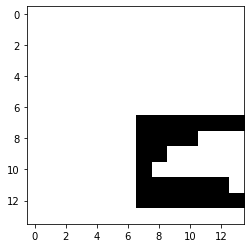


Predicted Output: 5


In [ ]:
plt.imshow(topleft, cmap="binary")
plt.show()
print("\nPredicted Output: {}".format(np.argmax(pred)))

In [ ]:
keras_file1='model_tl.h5'
keras_file2='model_tr.h5'
keras_file3='model_bl.h5'
keras_file4='model_br.h5'
tf.keras.models.save_model(model_tl,keras_file1)
tf.keras.models.save_model(model_tr,keras_file2)
tf.keras.models.save_model(model_bl,keras_file3)
tf.keras.models.save_model(model_br,keras_file4)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_tl)
tflite_model = converter.convert()
with open('model_tl.tflite', 'wb') as f:
  f.write(tflite_model)
converter = tf.lite.TFLiteConverter.from_keras_model(model_tr)
tflite_model = converter.convert()
with open('model_tr.tflite', 'wb') as f:
  f.write(tflite_model)
converter = tf.lite.TFLiteConverter.from_keras_model(model_bl)
tflite_model = converter.convert()
with open('model_bl.tflite', 'wb') as f:
  f.write(tflite_model)
converter = tf.lite.TFLiteConverter.from_keras_model(model_br)
tflite_model = converter.convert()
with open('model_br.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")